In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the data 
full_data = pd.read_csv("/Users/derekwang/Desktop/Python/Sales Forecast/data_training_prior_quarters.csv")

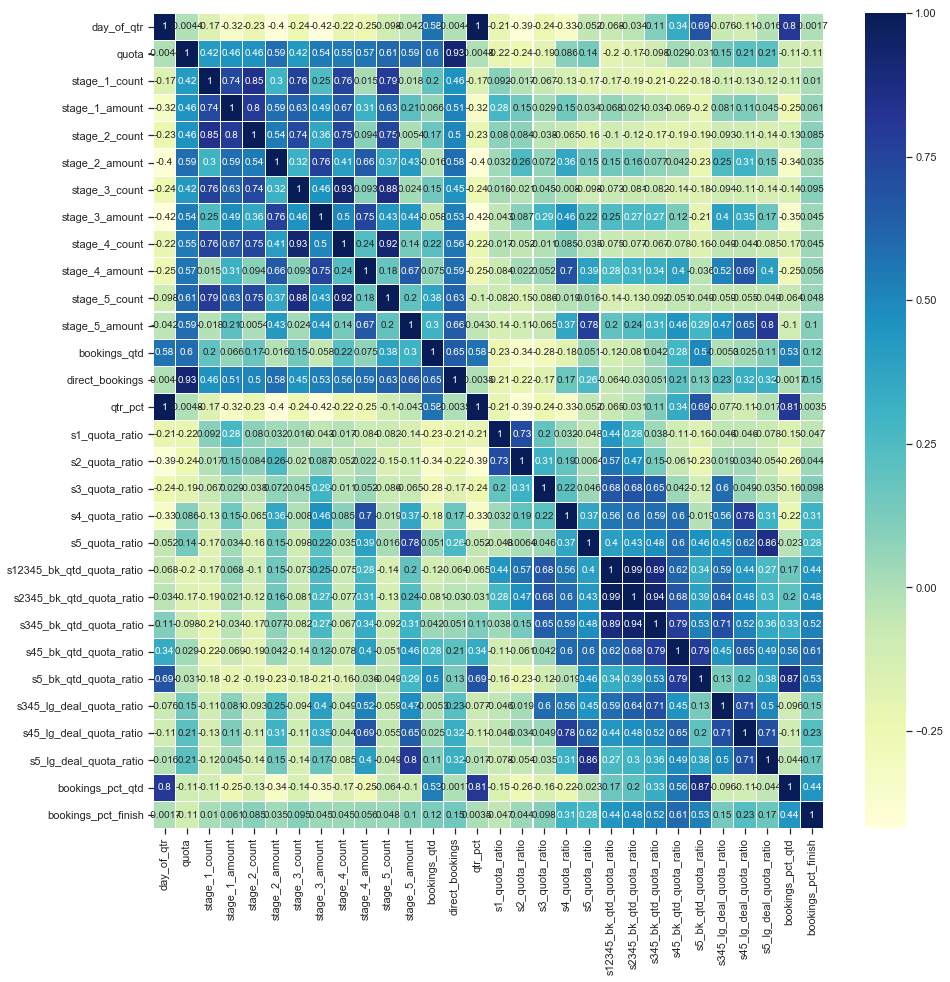

In [3]:
fig, ax = plt.subplots(figsize=(15,15)) #Sample figsize in inches

sns.heatmap(full_data.corr(), annot=True, cmap="YlGnBu", linewidths=.1, ax=ax);

In [4]:
# Define outcome
outcomes_raw = full_data[['bookings_pct_finish']]

# Define features
features_raw = full_data.drop(['bookings_pct_finish'], axis = 1)

# display(features_raw.head())
print(features_raw.columns)
# features_raw.describe()

Index(['dt', 'fy_quarter', 'day_of_qtr', 'sales_div', 'quota', 'stage_1_count',
       'stage_1_amount', 'stage_2_count', 'stage_2_amount', 'stage_3_count',
       'stage_3_amount', 'stage_4_count', 'stage_4_amount', 'stage_5_count',
       'stage_5_amount', 'bookings_qtd', 'direct_bookings', 'qtr_pct',
       's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio',
       's5_quota_ratio', 's12345_bk_qtd_quota_ratio',
       's2345_bk_qtd_quota_ratio', 's345_bk_qtd_quota_ratio',
       's45_bk_qtd_quota_ratio', 's5_bk_qtd_quota_ratio',
       's345_lg_deal_quota_ratio', 's45_lg_deal_quota_ratio',
       's5_lg_deal_quota_ratio', 'bookings_pct_qtd'],
      dtype='object')


In [5]:
# fill in NA's with 0 - FEATURES
features = features_raw.fillna(0.0)
# display(features.head())
print(features.columns)


# fill in NA's with 0 - OUTCOMES
outcomes = outcomes_raw.fillna(0.0)
# display(outcomes.head())
print(outcomes.columns)

Index(['dt', 'fy_quarter', 'day_of_qtr', 'sales_div', 'quota', 'stage_1_count',
       'stage_1_amount', 'stage_2_count', 'stage_2_amount', 'stage_3_count',
       'stage_3_amount', 'stage_4_count', 'stage_4_amount', 'stage_5_count',
       'stage_5_amount', 'bookings_qtd', 'direct_bookings', 'qtr_pct',
       's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio',
       's5_quota_ratio', 's12345_bk_qtd_quota_ratio',
       's2345_bk_qtd_quota_ratio', 's345_bk_qtd_quota_ratio',
       's45_bk_qtd_quota_ratio', 's5_bk_qtd_quota_ratio',
       's345_lg_deal_quota_ratio', 's45_lg_deal_quota_ratio',
       's5_lg_deal_quota_ratio', 'bookings_pct_qtd'],
      dtype='object')
Index(['bookings_pct_finish'], dtype='object')


In [6]:
# split test set and train set
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [7]:
# drop features and columns that are not needed

X_train_raw2 = X_train_raw.drop(['dt', 'fy_quarter', 'day_of_qtr', 'quota', 'stage_1_count', 'stage_1_amount', 
                          'stage_2_count', 'stage_2_amount', 'stage_3_count', 'stage_3_amount', 'stage_4_count', 
                          'stage_4_amount', 'stage_5_count', 'stage_5_amount', 'bookings_qtd', 'direct_bookings',
                          's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'
#                          ,'sales_div'     
                                ], 
                                axis = 1)

X_test_raw2 = X_test_raw.drop(['dt', 'fy_quarter', 'day_of_qtr', 'quota', 'stage_1_count', 'stage_1_amount', 
                          'stage_2_count', 'stage_2_amount', 'stage_3_count', 'stage_3_amount', 'stage_4_count', 
                          'stage_4_amount', 'stage_5_count', 'stage_5_amount', 'bookings_qtd', 'direct_bookings',
                          's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'
#                          ,'sales_div'   
                              ], 
                              axis = 1)


In [8]:
# One-hot encoding
X_train = pd.get_dummies(X_train_raw2)
X_test = pd.get_dummies(X_test_raw2)

In [9]:
# get rid of blanks in headers

X_train.columns = X_train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print('X_train columns')
print(X_train.columns)
display(X_train.head())

X_test.columns = X_test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print('X_test columns')
print(X_test.columns)
display(X_test.head())

X_train columns
Index(['qtr_pct', 's12345_bk_qtd_quota_ratio', 's2345_bk_qtd_quota_ratio',
       's345_bk_qtd_quota_ratio', 's45_bk_qtd_quota_ratio',
       's5_bk_qtd_quota_ratio', 's345_lg_deal_quota_ratio',
       's45_lg_deal_quota_ratio', 's5_lg_deal_quota_ratio', 'bookings_pct_qtd',
       'sales_div_api', 'sales_div_comm', 'sales_div_comm-vast',
       'sales_div_ed', 'sales_div_ent', 'sales_div_gov',
       'sales_div_healthcare', 'sales_div_intl', 'sales_div_intl-anz',
       'sales_div_intl-apac', 'sales_div_intl-emea', 'sales_div_intl-uk',
       'sales_div_majors', 'sales_div_network_alliance', 'sales_div_smb',
       'sales_div_smb-vast'],
      dtype='object')


,qtr_pct,s12345_bk_qtd_quota_ratio,s2345_bk_qtd_quota_ratio,s345_bk_qtd_quota_ratio,s45_bk_qtd_quota_ratio,s5_bk_qtd_quota_ratio,s345_lg_deal_quota_ratio,s45_lg_deal_quota_ratio,s5_lg_deal_quota_ratio,bookings_pct_qtd,...,sales_div_healthcare,sales_div_intl,sales_div_intl-anz,sales_div_intl-apac,sales_div_intl-emea,sales_div_intl-uk,sales_div_majors,sales_div_network_alliance,sales_div_smb,sales_div_smb-vast
5371,0.460674,1.566255,1.549619,1.263339,1.083673,0.538642,0.382780,0.351366,0.126043,0.298395,...,0,0,0,0,0,0,1,0,0,0
5357,0.303371,1.333707,1.291981,0.963914,0.737444,0.316734,0.124183,0.099500,0.000000,0.198838,...,0,0,0,0,0,0,1,0,0,0
4728,0.358696,2.139607,2.077351,1.939514,1.413554,0.403071,0.663851,0.663851,0.000000,0.312814,...,0,0,0,0,0,1,0,0,0,0
1940,0.426966,1.102754,1.096739,0.812188,0.727905,0.400010,0.352354,0.352354,0.117819,0.138759,...,0,0,0,0,0,0,0,0,0,0
1027,0.370787,1.407661,1.374450,0.981042,0.740530,0.537736,0.000000,0.000000,0.000000,0.392556,...,0,0,0,0,0,0,0,0,0,0


X_test columns
Index(['qtr_pct', 's12345_bk_qtd_quota_ratio', 's2345_bk_qtd_quota_ratio',
       's345_bk_qtd_quota_ratio', 's45_bk_qtd_quota_ratio',
       's5_bk_qtd_quota_ratio', 's345_lg_deal_quota_ratio',
       's45_lg_deal_quota_ratio', 's5_lg_deal_quota_ratio', 'bookings_pct_qtd',
       'sales_div_api', 'sales_div_comm', 'sales_div_comm-vast',
       'sales_div_ed', 'sales_div_ent', 'sales_div_gov',
       'sales_div_healthcare', 'sales_div_intl', 'sales_div_intl-anz',
       'sales_div_intl-apac', 'sales_div_intl-emea', 'sales_div_intl-uk',
       'sales_div_majors', 'sales_div_network_alliance', 'sales_div_smb',
       'sales_div_smb-vast'],
      dtype='object')


,qtr_pct,s12345_bk_qtd_quota_ratio,s2345_bk_qtd_quota_ratio,s345_bk_qtd_quota_ratio,s45_bk_qtd_quota_ratio,s5_bk_qtd_quota_ratio,s345_lg_deal_quota_ratio,s45_lg_deal_quota_ratio,s5_lg_deal_quota_ratio,bookings_pct_qtd,...,sales_div_healthcare,sales_div_intl,sales_div_intl-anz,sales_div_intl-apac,sales_div_intl-emea,sales_div_intl-uk,sales_div_majors,sales_div_network_alliance,sales_div_smb,sales_div_smb-vast
6270,0.370787,1.243183,1.044594,0.599515,0.464383,0.377464,0.000000,0.000000,0.000000,0.313309,...,0,0,0,0,0,0,0,0,1,0
1410,0.586957,1.330312,1.287882,1.095351,0.947641,0.630544,0.000000,0.000000,0.000000,0.405204,...,0,0,0,0,0,0,0,0,0,0
1554,0.191011,3.583783,3.541221,3.267418,2.831888,1.530476,1.925467,1.799276,0.946190,0.265562,...,0,0,0,0,0,0,0,0,0,0
4868,0.880435,1.367796,1.344903,1.298055,1.193864,1.070731,0.344796,0.344796,0.344796,0.611918,...,0,0,0,0,0,1,0,0,0,0
2351,0.945652,1.418356,1.278214,1.100895,0.775434,0.330543,0.000000,0.000000,0.000000,0.298143,...,0,0,0,0,0,0,0,0,0,0


### Documentations needed:

#### RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### GridSearchCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### make_scorer
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [10]:
## TUNING using grid search, using customized scoring system

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
rf = RandomForestRegressor(n_estimators=100)

# Choose some parameter combinations to try
parameters = {'max_depth': [None,2,3,4,5,10], 
              'min_samples_split': [2,3,4,5,6,20],
              'min_samples_leaf': [3,4,5,10,50]
             }

# Type of scoring used to compare parameter combinations
def avg_abs_var_finish(y,yhat):
    var_finish = np.subtract(y,yhat)
    abs_var_finish = abs(var_finish)
    av_abs_var_finish = np.mean(abs_var_finish)
    return av_abs_var_finish
    
my_scorer = make_scorer(avg_abs_var_finish, greater_is_better=False)

# Run the grid search
grid_obj = GridSearchCV(rf, parameters, scoring=my_scorer, verbose=1, cv=3)
cv = grid_obj.fit(X_train, y_train.bookings_pct_finish)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  8.8min finished


In [11]:
# ## TUNING using grid search, using r2_score

# from sklearn.metrics import make_scorer, r2_score
# from sklearn.model_selection import GridSearchCV

# # Choose the type of classifier. 
# rf = RandomForestRegressor(n_estimators=100)

# # Choose some parameter combinations to try
# parameters = {'max_depth': [None,2,3,4,5,10], 
#               'min_samples_split': [2,3,4,5,6,20],
#               'min_samples_leaf': [3,4,5,10,50]
#              }

# my_scorer = make_scorer(r2_score)

# # Run the grid search
# grid_obj = GridSearchCV(rf, parameters, scoring=my_scorer, verbose=1, cv=3)
# cv = grid_obj.fit(X_train, y_train.bookings_pct_finish)

In [12]:
print(cv.best_estimator_)
print(cv.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-0.03305771880099244


In [13]:
# use the best parameters for model tuning, but fit with n_estimators
rf_tuned = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf_tuned.fit(X_train,y_train.bookings_pct_finish)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
rf_tuned.score(X_train,y_train)

0.9932309097233055

In [15]:
# Predict using RandomForestClassifier on the test data
y_test_hat = rf_tuned.predict(X_test)

In [16]:
y_test_hat = y_test_hat.flatten()
y_test_hat = pd.DataFrame(y_test_hat)
display(y_test_hat.head())

,0
0,1.062609
1,0.832068
2,1.622251
3,1.110325
4,0.454048


In [17]:
# scoring

from sklearn.metrics import r2_score

r2_scoring = r2_score(y_test,y_test_hat)
print('r2_score')
print(r2_scoring)
print('')
    
def avg_abs_var_finish(y,yhat):
    var_finish = np.subtract(y,yhat)
    abs_var_finish = abs(var_finish)
    av_abs_var_finish = np.mean(abs_var_finish)
    print('avg_abs_var_finish')
    print(av_abs_var_finish)
    print('')
    
def avg_abs_var_pct(y,yhat):
    var_percent = np.subtract(y,yhat)/y_test
    abs_var_percent = abs(var_percent)
    av_abs_var_percent = np.mean(abs_var_percent)
    print('av_abs_var_percent')
    print(av_abs_var_percent)
    print('')
    
avg_abs_var_pct(y_test,y_test_hat)

avg_abs_var_finish(y_test,y_test_hat)

r2_score
0.9786582591509108

av_abs_var_percent
bookings_pct_finish    0.027408
dtype: float64

avg_abs_var_finish
bookings_pct_finish    0.023591
dtype: float64



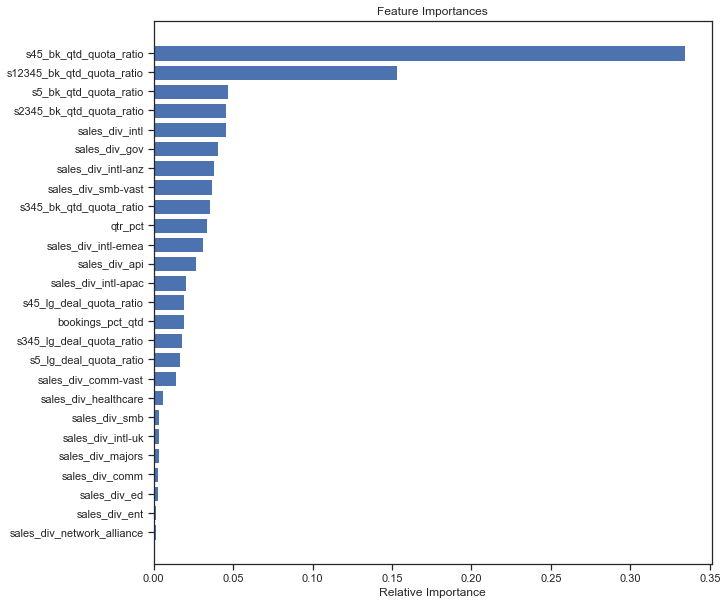

In [18]:
# Feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

features = X_train.columns[:X_train.shape[1]]
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

In [25]:
# export the y_test, compare with actuals
from datetime import date

df = pd.concat([X_test_raw.reset_index(), y_test.reset_index(), y_test_hat.reset_index()], axis=1)
df.to_csv("/Users/derekwang/Desktop/Python/Sales Forecast/results_compare__2_random_forest_" + str(date.today()) + ".csv", sep=',')

In [27]:
#### predict for current quarter ####

# Load the current_quarter_data 
curr_data = pd.read_csv("/Users/derekwang/Desktop/Python/Sales Forecast/data_testing_curr_quarter.csv")

# Define outcome
outcomes_raw_c = curr_data[['bookings_pct_finish']]

# Define features = removing outcome, dt, and fy_quarter label
features_raw_c1 = curr_data.drop(['direct_bookings', 'bookings_pct_finish'], axis = 1)

features_raw_c = features_raw_c1.drop(['dt', 
                                'fy_quarter', 
                                'day_of_qtr', 
                                'quota', 
                                'stage_1_count', 
                                'stage_1_amount', 
                                'stage_2_count', 
                                'stage_2_amount', 
                                'stage_3_count', 
                                'stage_3_amount', 
                                'stage_4_count', 
                                'stage_4_amount', 
                                'stage_5_count', 
                                'stage_5_amount', 
                                'bookings_qtd',
                                's1_quota_ratio', 's2_quota_ratio', 's3_quota_ratio', 's4_quota_ratio','s5_quota_ratio'
#                                      ,'sales_div'   
                                      ], axis = 1)

# fill in NA's with 0 - FEATURES
features_c = features_raw_c.fillna(0.0)

# fill in NA's with 0 - OUTCOMES
outcomes_c = outcomes_raw.fillna(0.0)

# One-hot encoding
X_curr = pd.get_dummies(features_c)

# get rid of blanks in headers
X_curr.columns = X_curr.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# predict
y_curr = rf_tuned.predict(X_curr)

# flatten results
y_curr = y_curr.flatten()
y_curr = pd.DataFrame(y_curr)

# export prediciton
dfc = pd.concat([features_raw_c1.reset_index(), y_curr.reset_index()], axis=1)
dfc.to_csv("/Users/derekwang/Desktop/Python/Sales Forecast/curr_quarter_prediction__2_random_forest_" + str(date.today()) + ".csv", sep=',')